<a href="https://colab.research.google.com/github/avitorvilela/ceub_ia/blob/main/classificacao_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos inciar o desenvolvimento da árvore de decisão que classificará Iris. Para isso, vamos carregar o arquivo de texto iris.data para o Python. Vamos utilizar o Pandas.

In [ ]:
import pandas as pd

In [ ]:
nomeColunas = ['alturaSepala', 'larguraSepala', 'alturaPetala', 'larguraPetala', 'classe']
df = pd.read_csv("/content/iris.data", names=nomeColunas)
print(f"Qtd. de linhas: {len(df)}")
print(f"Qtd. de colunas: {len(df.columns)}")

Qtd. de linhas: 150
Qtd. de colunas: 5


Uma vez que carregamos os dados do arquivo CSV para a variável ***df***, vamos ver como ficou o dataFrame.

In [ ]:
df.head()
# df.tail()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Vamos explorar um pouco mais do Pandas. Vamos pedir para o Pandas mostrar quantos registros existem para cada tipo de Iris.

In [ ]:
df['classe'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: classe, dtype: int64

Continuando o estudo para ver levemento o potencial do Pandas, vamos pedir para ele nos mostrar o resultado acima no gráfico.
Grafico em pizza (***pie***)

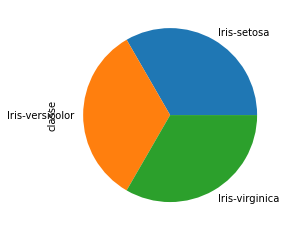

In [ ]:
df['classe'].value_counts().plot(kind='pie');

Gráfico de barras (***bar***)

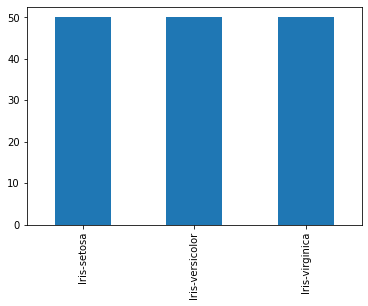

In [ ]:
df['classe'].value_counts().plot(kind='bar');

Vamos continuar estudando o petencial do Pandas. Para isso, vamos utilizar funções que analisam valores numéricos. Veremos o máximo, o mínimo e a média.

In [ ]:
print(f"Menor valor da coluna alturaSepala: {df['alturaSepala'].min()}")
print(f"Maior valor da coluna alturaSepala: {df['alturaSepala'].max()}")
print(f"Altura da coluna alturaSepala: {df['alturaSepala'].mean()}")

Menor valor da coluna alturaSepala: 4.3
Maior valor da coluna alturaSepala: 7.9
Altura da coluna alturaSepala: 5.843333333333335


Vamos criar duas colunas novas a partir da combinação de colunas existentes. No caso, vamos criar as colunas ***areaSepala*** e ***areaPetala***

In [ ]:
df['areaSepala'] = df['alturaSepala'] * df['larguraSepala']
df['areaPetala'] = df['alturaPetala'] * df['larguraPetala']
df.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,classe,areaSepala,areaPetala
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


Até aqui exploramos os dados com o ***Pandas***. Agora vamos inicar a aplicação de conceitos típicos de IA. Para isso, vamos separara as variáveis INDEPENDENTES das DEPENDENTES.



In [ ]:
varIndependentes = df.columns.difference(['classe'], sort=False)
x = df[varIndependentes].values
y = df['classe'].values

Uma vez que separamos as variáveis independentes das dependentes, vamos inicar a 'magia'. O primeiro passo é importar a biblioteca que comtempla os algoritmos de IA.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Uma vez que o componente que costruirá a árvore foi importado, vamos criar um objeto que ficará responsável pela criação da árvore.

In [ ]:
objClassificador = DecisionTreeClassifier(random_state=10, criterion='gini', max_depth=2)

Uma vez que o objeto que construirá a árvore de decisão foi criado, vamos partir para o treinamento (geração da árvore). No ***sklearn***, os treinamentos ocorrem, normalmento, por meio da chamada da função ***fit()***.

In [ ]:
objClassificador.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=10)

Agora que a árvore foi gerada, vamos vê-la!

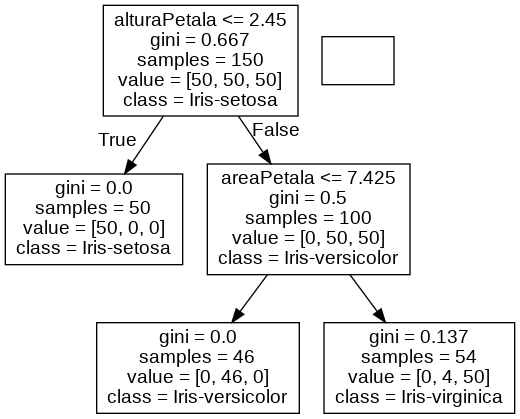

In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClassificador, out_file=None, 
                                feature_names=varIndependentes,  
                                class_names=df.classe.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Uma vez que a árvore de decisão foi criada, vamos utilizá-la para previsão de 
Iris com medidas que ela nunca viu anteriormente.

In [ ]:
iris1 = [5.1,3.5,1.4,0.2,17.85,0.28]  # setosa
iris2 = [7.0, 3.2, 4.7,1.4,22.4,6.58] # versicolor
iris3 = [7.2,3.6,6.1,2.5,25.92,15.25] # virginica
iris4 = [5.0,2.4,1.8,0.2,12.0,0.36]   # ?????
conjuntoIris = pd.DataFrame([iris1,iris2,iris3,iris4],columns = varIndependentes)
objClassificador.predict(conjuntoIris) # Prevê a espécie baseado nas medidas

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

Até o momento, utilizamos TODOS os 150 registros de Iris para o treinamento. No entanto, para evitar ***overfitting***, vamos separar 10% dos registros para testar o modelo após o treinamento. O ***sklearn*** oferece um componente que faz essa separação, é o ***train_test_split.***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
print("Qtd. de registros separados para treinamento:", len(x_train))
print("Qtd. de registros separados para teste:", len(x_test))


Qtd. de registros separados para treinamento: 127
Qtd. de registros separados para teste: 23


Agora que estamos ficando Jedis na IA, vamos utilizar os registros de treinamento para treinar o modelo. Para isso, utilizaremos os valores de ***x_train*** e ***y_train***.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc
objClassificador2 = dtc(criterion="entropy",max_depth=2)
objClassificador2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Vamos ver como ficou a árvore gerada apenas com os dados de treinamento.

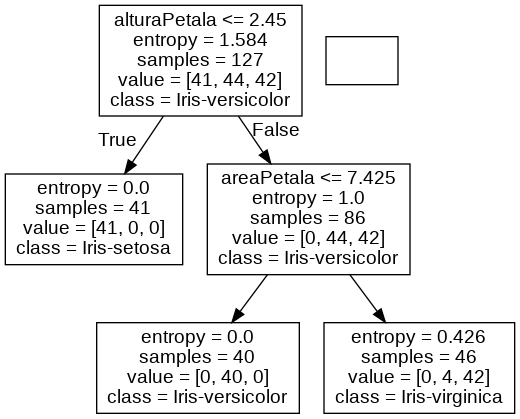

In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClassificador2, out_file=None, 
                                feature_names=varIndependentes,  
                                class_names=df.classe.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Agora que a árvore foi gerada com os dados de treinamento, vamos ver a sua performance ao avaliar os dados separados para teste.

In [ ]:
#print(x_test)
#print(y_test)
from sklearn.metrics import accuracy_score
y_pred = objClassificador2.predict(x_test)
precisao = accuracy_score(y_test, y_pred)
print("A acurácia do modelo foi:", precisao)

A acurácia do modelo foi: 1.0
